In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
delphi = np.genfromtxt('delphi.csv', delimiter=",", dtype=float).flatten()
delphi_995p = np.genfromtxt('delphi_995p_pmip3_ipsl.csv', delimiter=",", dtype=float).flatten()
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()


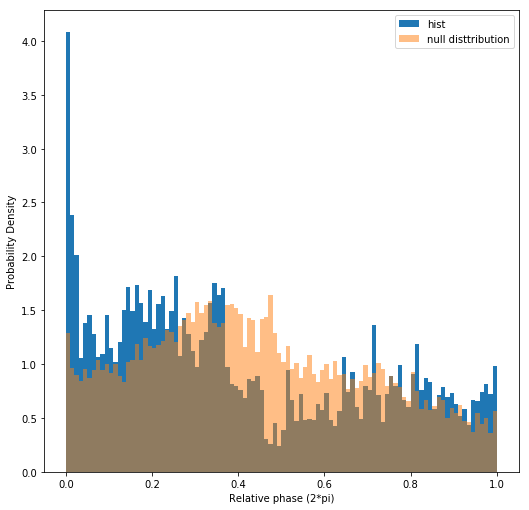

In [4]:
N=100
win = 240 # window = 20 years
delphi_dist_1 = np.zeros((N,win))
delphi_995p_dist_1 = np.zeros((N,win))
volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    delphi_window = delphi[rand_year[0]:rand_year[0]+win]
    delphi_dist_1[i,:] = (delphi_window - stats.mode(delphi_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] > 0.1 : # No Eruption 
        continue    
    delphi_995p_window = delphi_995p[rand_year[0]:rand_year[0]+win]
    delphi_995p_dist_1[i,:] = (delphi_995p_window - stats.mode(delphi_995p_window)[0])
    i = i + 1
    
delphi_dist_2 = delphi_dist_1.flatten()
delphi_995p_dist_2 = delphi_995p_dist_1.flatten()

delphi_dist_2 = delphi_dist_2 / (2*3.14)
delphi_995p_dist_2 = delphi_995p_dist_2 / (2*3.14)

plt.figure(figsize=[8.5, 8.5])
_, bins, _ = plt.hist(delphi_dist_2, bins=100, range=[0, 1], normed=True, label = 'hist')
_ = plt.hist(delphi_995p_dist_2, bins=bins, alpha=0.5, normed=True, label = 'null disttribution')

#plt.figure(figsize=[8.5, 8.5])
plt.xlabel('Relative phase (2*pi)')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('phase_diff_dist.png', format='png', dpi=1000)

In [11]:
delphi_cmip5 = np.genfromtxt('delphi_pi.csv', delimiter=",", dtype=float)[400:].flatten()
delphi_995p_cmip5 = np.genfromtxt('delphi_995p_pmip3_ipsl_cmip5_picontrol.csv', delimiter=",", dtype=float).flatten()

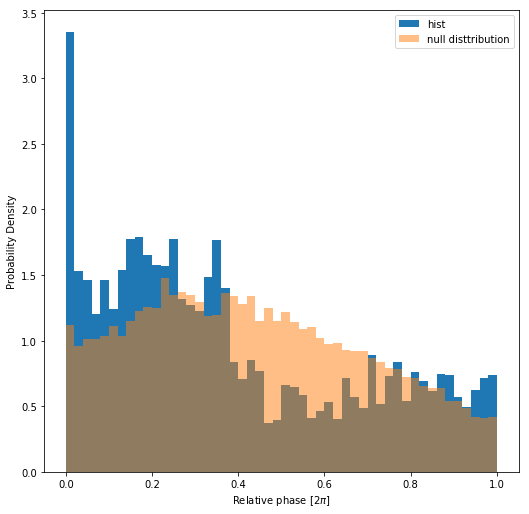

In [16]:
N=1000
win = 240 # window = 20 years
delphi_dist_1 = np.zeros((N,win))
delphi_995p_dist_1 = np.zeros((N,win))
delphi_cmip5_dist_1 = np.zeros((N,win))
delphi_995p_cmip5_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    delphi_window = delphi[rand_year[0]:rand_year[0]+win]
    delphi_dist_1[i,:] = (delphi_window - stats.mode(delphi_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi.shape[0]-win), 1)
    delphi_995p_window = delphi_995p[rand_year[0]:rand_year[0]+win]
    delphi_995p_dist_1[i,:] = (delphi_995p_window - stats.mode(delphi_995p_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_cmip5.shape[0]-win), 1)
    delphi_cmip5_window = delphi_cmip5[rand_year[0]:rand_year[0]+win]
    delphi_cmip5_dist_1[i,:] = (delphi_cmip5_window - stats.mode(delphi_cmip5_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_cmip5.shape[0]-win), 1)
    delphi_995p_cmip5_window = delphi_995p_cmip5[rand_year[0]:rand_year[0]+win]
    delphi_995p_cmip5_dist_1[i,:] = (delphi_995p_cmip5_window - stats.mode(delphi_995p_cmip5_window)[0])
    i = i + 1
    
delphi_dist_2 = delphi_dist_1.flatten()
delphi_995p_dist_2 = delphi_995p_dist_1.flatten()
delphi_cmip5_dist_2 = delphi_cmip5_dist_1.flatten()
delphi_995p_cmip5_dist_2 = delphi_995p_cmip5_dist_1.flatten()

delphi_dist_2 = delphi_dist_2 / (2*3.14)
delphi_995p_dist_2 = delphi_995p_dist_2 / (2*3.14)
delphi_cmip5_dist_2 = delphi_cmip5_dist_2 / (2*3.14)
delphi_995p_cmip5_dist_2 = delphi_995p_cmip5_dist_2 / (2*3.14)

plt.figure(figsize=[8.5, 8.5])
weights = np.ones_like(delphi_dist_2)/float(len(delphi_dist_2))
_, bins, _ = plt.hist(delphi_dist_2, bins=50, range=[0, 1], normed=True, label = 'hist', weights=weights)

weights = np.ones_like(delphi_995p_dist_2)/float(len(delphi_995p_dist_2))
_ = plt.hist(delphi_995p_dist_2, bins=bins, alpha=0.5, normed=True, label = 'null disttribution', weights=weights)

#weights = np.ones_like(delphi_cmip5_dist_2)/float(len(delphi_cmip5_dist_2))
#_ = plt.hist(delphi_cmip5_dist_2, bins=bins, alpha=0.5, normed=True, label = 'PI control', weights=weights)
plt.legend()
plt.xlabel('Relative phase $[2\pi]$')
plt.ylabel('Probability Density')
plt.savefig('phase_diff_dist_hist.png', format='png', dpi=1000)


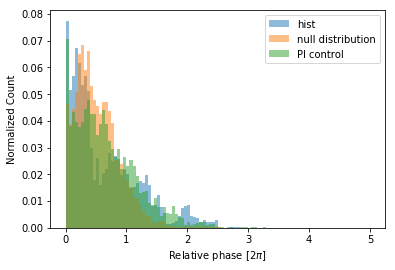

In [5]:
myarray = delphi_dist_2
weights = np.ones_like(myarray)/float(len(myarray))
_, bins, _ = plt.hist(myarray, weights=weights, bins=100, range=[0,5], label = 'hist', alpha=0.5, ls='dashed', lw=3)

myarray = delphi_995p_dist_2
weights = np.ones_like(myarray)/float(len(myarray))
_, bins, _ = plt.hist(myarray, weights=weights, bins=bins, range=[0,5], label = 'null distribution', alpha=0.5, ls='dotted', lw=3)


myarray = delphi_cmip5_dist_2
weights = np.ones_like(myarray)/float(len(myarray))
_, bins, _ = plt.hist(myarray, weights=weights, bins=bins, range=[0,5], label = 'PI control', alpha=0.5,  lw=3)
plt.legend()
plt.xlabel('Relative phase $[2\pi]$')
plt.ylabel('Normalized Count')
plt.savefig('phase_diff_dist_pi_hist.png', format='png', dpi=1000)

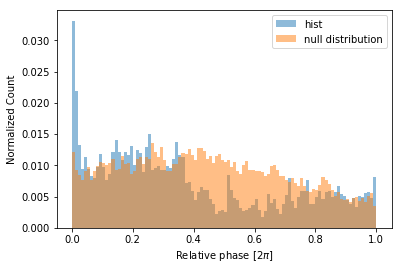

In [12]:
myarray = delphi_dist_2
weights = np.ones_like(myarray)/float(len(myarray))
_, bins, _ = plt.hist(myarray, weights=weights, bins=100, range=[0,1],label = 'hist', alpha=0.5, ls='dashed', lw=3)

myarray = delphi_995p_dist_2
weights = np.ones_like(myarray)/float(len(myarray))
_, bins, _ = plt.hist(myarray, weights=weights, bins=bins,label = 'null distribution', alpha=0.5, ls='dotted', lw=3)



plt.legend()
plt.xlabel('Relative phase $[2\pi]$')
plt.ylabel('Normalized Count')
plt.savefig('phase_diff_dist.png', format='png', dpi=1000)

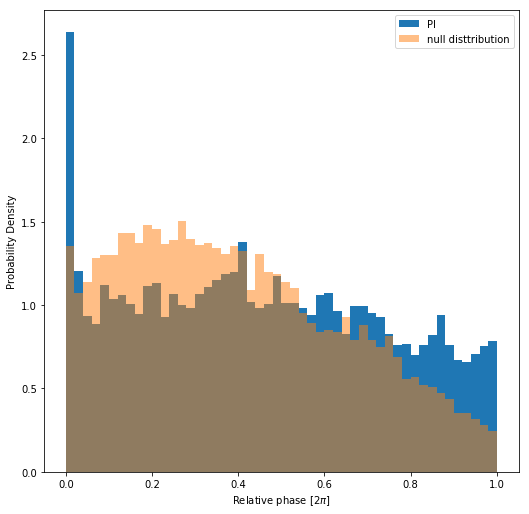

In [20]:
plt.figure(figsize=[8.5, 8.5])
weights = np.ones_like(delphi_cmip5_dist_2)/float(len(delphi_cmip5_dist_2))
_, bins, _ = plt.hist(delphi_cmip5_dist_2, bins=50, range=[0, 1], normed=True, label = 'PI', weights=weights)

weights = np.ones_like(delphi_995p_cmip5_dist_2)/float(len(delphi_995p_cmip5_dist_2))
_ = plt.hist(delphi_995p_cmip5_dist_2, bins=bins, alpha=0.5, normed=True, label = 'null disttribution', weights=weights)

#weights = np.ones_like(delphi_cmip5_dist_2)/float(len(delphi_cmip5_dist_2))
#_ = plt.hist(delphi_cmip5_dist_2, bins=bins, alpha=0.5, normed=True, label = 'PI control', weights=weights)
plt.legend()
plt.xlabel('Relative phase $[2\pi]$')
plt.ylabel('Probability Density')
plt.savefig('phase_diff_dist_pi.png', format='png', dpi=1000)
